<a href="https://colab.research.google.com/github/gbiamgaurav/Assignments/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Import the modules

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### Get the Data

df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### Create a new column `affair`

In [4]:
df['affair'] = (df.affairs > 0).astype(int)

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
df.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

### Its a balanced data.

In [7]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [8]:
### check the meta data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [9]:
### Check for any missing values

df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [10]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


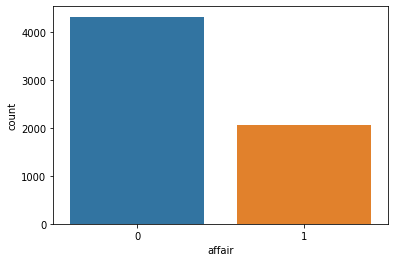

In [11]:
sns.countplot(df['affair'])

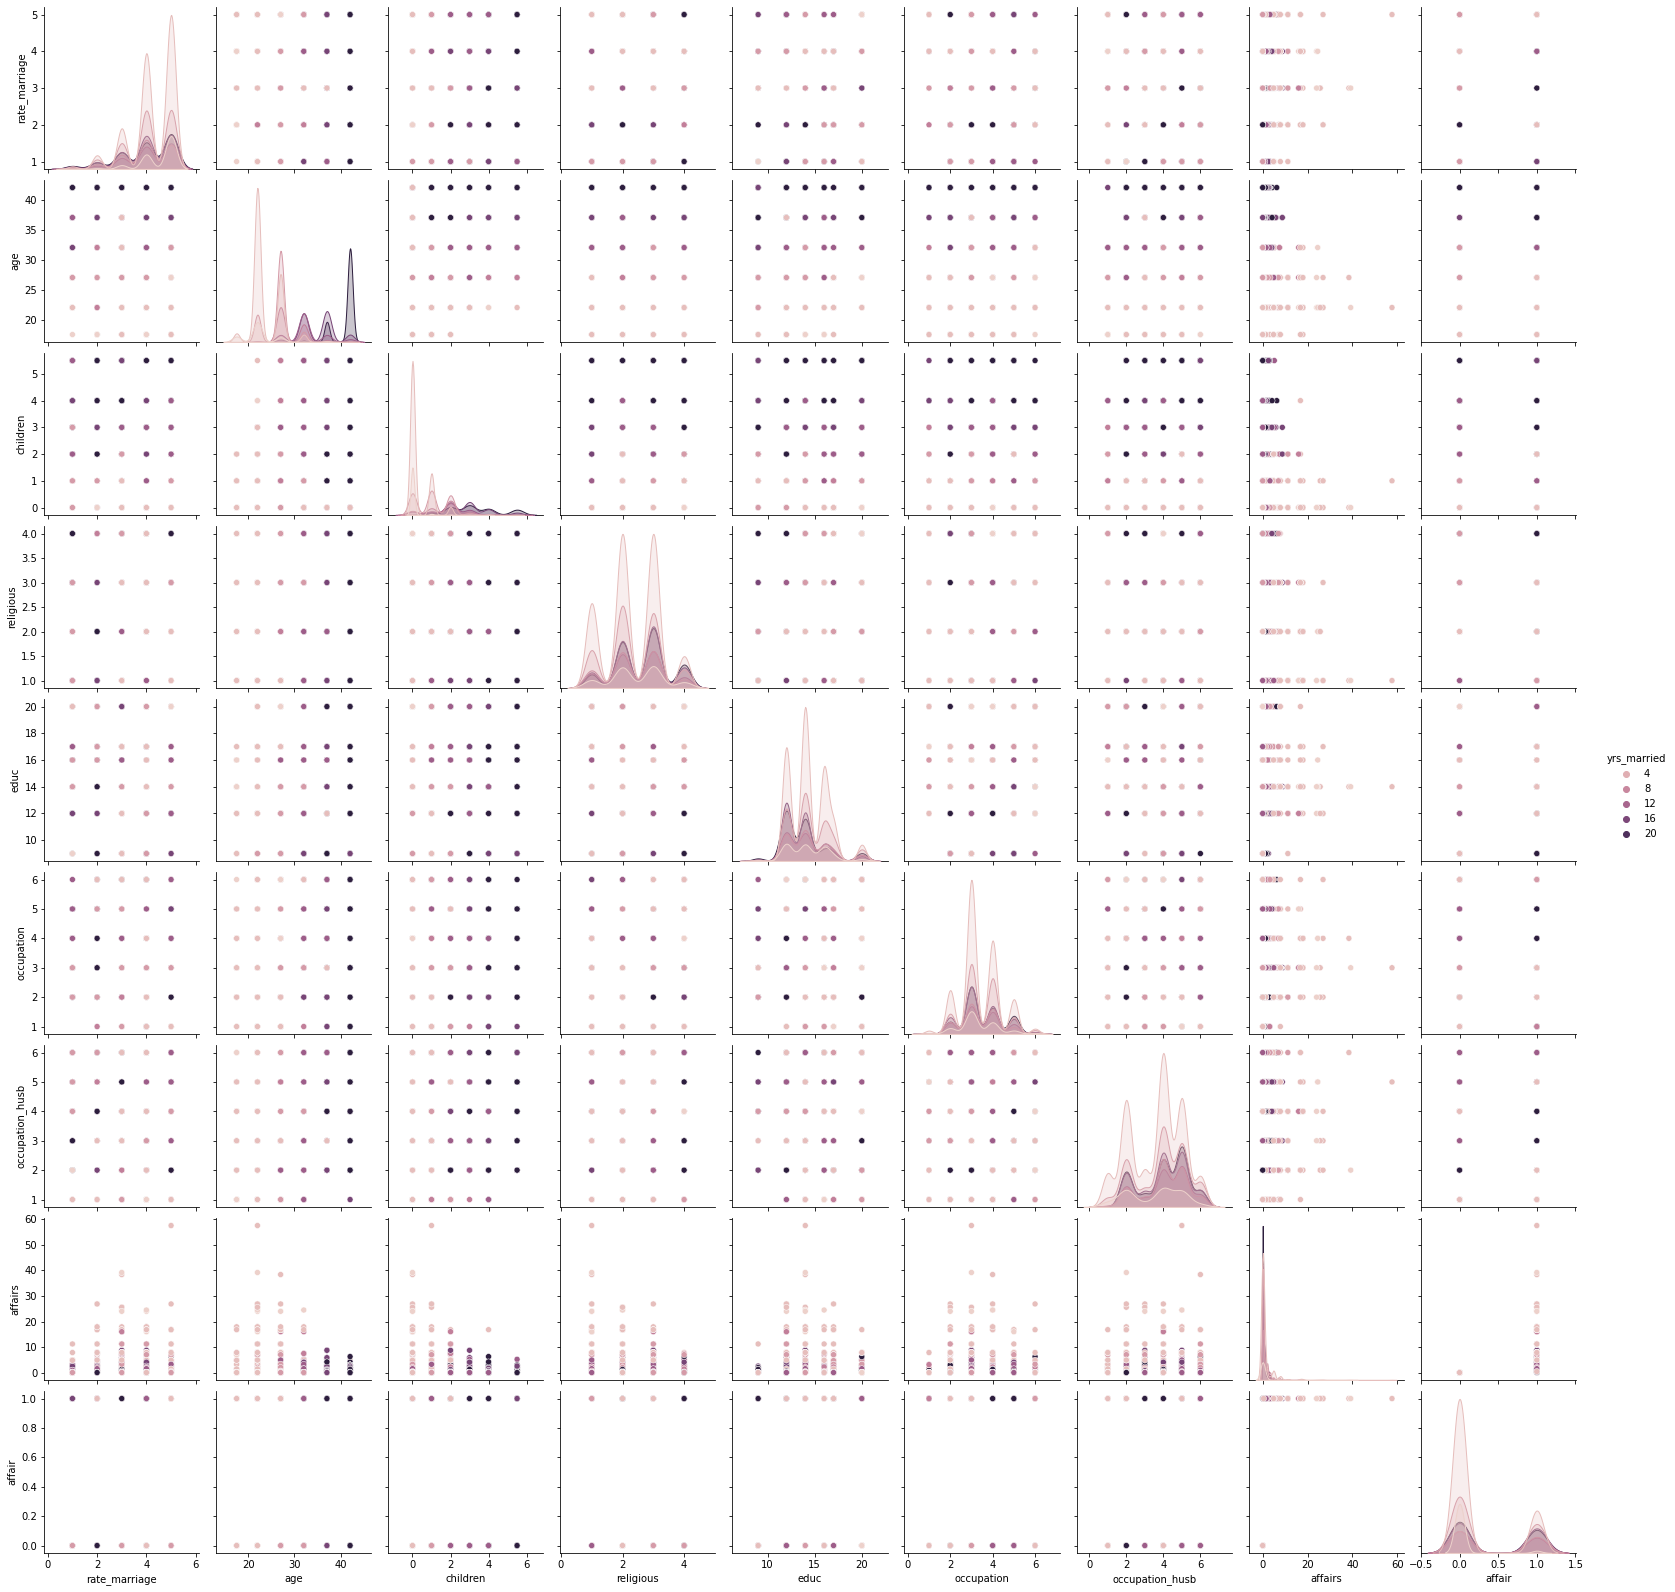

In [12]:
sns.pairplot(df, hue='yrs_married')

### Not much inference we can get from the pairplot, let'see correlation

In [13]:
df_corr = df.corr()

In [14]:
df_corr.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299


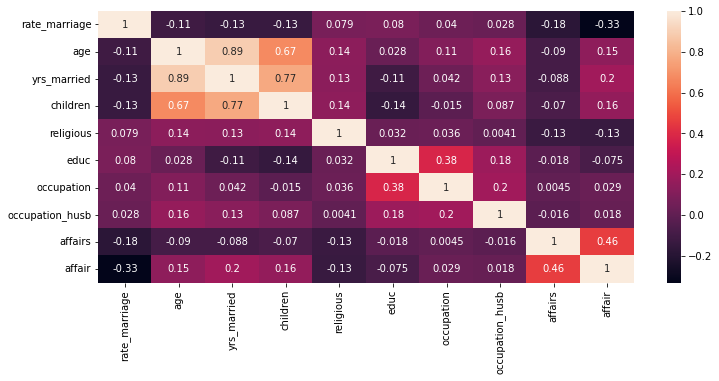

In [15]:
### Let's visualize in a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df_corr, fmt=".2g", annot=True)

In [16]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [17]:
df['yrs_married'].value_counts()


2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

In [18]:
df.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [19]:
df.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [20]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### Since we already made `affair` column we can drop the `affairs` column


In [21]:
df.drop(['affairs'], axis=1, inplace=True)

In [22]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [23]:
### Spilt the dataset into X and y 

X = df.iloc[:, :-1]

y = df.iloc[:,-1]

In [24]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

In [26]:
y.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [27]:
### Import Logistic Regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [28]:
log_reg = LogisticRegression()
grid = {"C": 10.0 ** np.arange(-2,3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
clf = log_reg.fit(X_train, y_train)

In [31]:
y_preds = clf.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_preds))

0.7229199372056515


In [33]:
clf = GridSearchCV(log_reg, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [34]:
y_preds = clf.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.7229199372056515


In [35]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       868
           1       0.61      0.36      0.45       406

    accuracy                           0.72      1274
   macro avg       0.68      0.63      0.63      1274
weighted avg       0.70      0.72      0.70      1274



In [36]:
### Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 2}
clf = RandomForestClassifier(class_weight=class_weights)

In [37]:
rf_model = clf.fit(X_train, y_train)
y_preds = rf_model.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

0.6868131868131868
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       868
           1       0.51      0.46      0.49       406

    accuracy                           0.69      1274
   macro avg       0.63      0.63      0.63      1274
weighted avg       0.68      0.69      0.68      1274



In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [40]:
log_clf = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.723061 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [42]:
y_preds = grid_search.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.7244897959183674


In [43]:
import pickle
pickle_out = open('clf.pkl', 'wb')
pickle.dump(clf, pickle_out)
pickle_out.close()

In [44]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [45]:
df.age.value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

In [48]:
clf = log_reg.fit(X_train, y_train)

y_preds = clf.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.7229199372056515


In [49]:
import pickle
pickle_out = open('log_reg.pkl', 'wb')
pickle.dump(log_reg, pickle_out)
pickle_out.close()

In [50]:
df.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affair               int64
dtype: object

In [52]:
df['rate_marriage'] = df['rate_marriage'].apply(int)
df['age'] = df['age'].apply(int)
df['yrs_married'] = df['yrs_married'].apply(int)
df['children'] = df['children'].apply(int)
df['religious'] = df['religious'].apply(int)
df['educ'] = df['educ'].apply(int)
df['occupation'] = df['occupation'].apply(int)
df['occupation_husb'] = df['occupation_husb'].apply(int)

In [54]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32,9,3,3,17,2,5,1
1,3,27,13,3,1,14,3,4,1
2,4,22,2,0,1,16,3,5,1
3,4,37,16,4,3,16,5,5,1
4,5,27,9,1,1,14,3,4,1


In [56]:
df.dtypes

rate_marriage      int64
age                int64
yrs_married        int64
children           int64
religious          int64
educ               int64
occupation         int64
occupation_husb    int64
affair             int64
dtype: object

In [57]:
### Spilt the dataset into X and y 

X = df.iloc[:, :-1]

y = df.iloc[:,-1]

In [58]:
log_reg = LogisticRegression()
grid = {"C": 10.0 ** np.arange(-2,3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
clf = log_reg.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

0.7213500784929356
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       856
           1       0.65      0.33      0.44       418

    accuracy                           0.72      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.71      0.72      0.69      1274



In [63]:
import pickle
pickle_out = open('log_reg.pkl', 'wb')
pickle.dump(log_reg, pickle_out)
pickle_out.close()